# Data visualization quality with SPRITE Part 1

Generates low-dimensional data visualizations from predicted spatial gene expression profiles (both before and after SPRITE postprocessing). Generates results associated with Figure 4 of the manuscript.

The notebook requires data files generated by the ``impute.py`` script run on all benchmark datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import scanpy as sc
from scipy.stats import pearsonr, spearmanr
import anndata as ad
import seaborn as sns
import pickle

from main import *
from downstream import *

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from scipy.stats import ttest_rel
from decimal import Decimal

In [2]:
# paths to results files (anndata)

filenames = ["scg_results/Dataset3_knn_spage_tangram.h5ad",
             "scg_results/Dataset9_knn_spage_tangram.h5ad",
             "scg_results/Dataset11_knn_spage_tangram.h5ad",
             "scg_results/Dataset12_knn_spage_tangram.h5ad",
             "scg_results/Dataset13_knn_spage_tangram.h5ad",
             "scg_results/Dataset14_knn_spage_tangram.h5ad",
             "scg_results/Dataset15_knn_spage_tangram.h5ad",
             "scg_results/Dataset17_knn_spage_tangram.h5ad",
             "scg_results/Axolotl_knn_spage_tangram.h5ad",
             "scg_results/Dataset7_knn_spage_tangram.h5ad",
             "scg_results/Dataset1_knn_spage_tangram.h5ad",
             ]

In [3]:
def dr_visualization (X, method):
    
    X_copy = X.copy()
    
    if method == "umap":
        reducer = umap.UMAP(random_state=444)
        X_viz = reducer.fit_transform(X_copy)
        
    elif method == "tsne":
        reducer = TSNE(init='pca', random_state=444)
        X_viz = reducer.fit_transform(X_copy)
        
    else:
        reducer = PCA(n_components=2)
        X_viz = reducer.fit_transform(X_copy)
        
    return (X_viz)

## Visualization metrics (comparison to measured data as ground truth)

In [4]:
models = ["knn", "spage", "tangram"]

outputs_for_dynamicviz = {}


for fn in filenames:
    
    print(fn)
    
    # set up dict
    dataset_name = fn.split("/")[1].split("_")[0]
    outputs_for_dynamicviz[dataset_name] = {}
    for model in models:
        outputs_for_dynamicviz[dataset_name][model] = {}
        outputs_for_dynamicviz[dataset_name][model]['measured'] = {}
        outputs_for_dynamicviz[dataset_name][model]['baseline'] = {}
        outputs_for_dynamicviz[dataset_name][model]['sprite'] = {}
    
    # read in data
    if os.path.isfile(fn):
        adata = sc.read_h5ad(fn)
    else:
        adata = large_load(fn.split(".h5ad")[0])
    
    # DR visualization
    for model in models:
        for dr_method in ['tsne', 'umap', 'pca']:

            # measured visualization
            measured_data = np.array(adata.X)
            measured_data = StandardScaler().fit_transform(measured_data)
            X_measured = dr_visualization(measured_data, dr_method)

            # get gene expression matrices
            add_baseline_imp = adata.obsm[model+"_predicted_expression_raw"].values.copy()
            add_baseline_imp = StandardScaler().fit_transform(add_baseline_imp)
            add_sprite_imp = adata.obsm["smoothed_reinforced_gene_joint_"+model+"_predicted_expression_raw"].values.copy()
            add_sprite_imp = StandardScaler().fit_transform(add_sprite_imp)

            # baseline visualization
            X_baseline = dr_visualization(add_baseline_imp, dr_method)

            # sprite visualization
            X_sprite = dr_visualization(add_sprite_imp, dr_method)

            # append data for dynamicviz
            outputs_for_dynamicviz[dataset_name][model]['ground_truth'] = measured_data
            outputs_for_dynamicviz[dataset_name][model]['measured'][dr_method] = X_measured
            outputs_for_dynamicviz[dataset_name][model]['baseline'][dr_method] = X_baseline
            outputs_for_dynamicviz[dataset_name][model]['sprite'][dr_method] = X_sprite

scg_results/Dataset3_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

scg_results/Dataset9_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

scg_results/Dataset11_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

scg_results/Dataset12_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

scg_results/Dataset13_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

scg_results/Dataset14_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

scg_results/Dataset15_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

scg_results/Dataset17_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

scg_results/Axolotl_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

scg_results/Dataset7_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

scg_results/Dataset1_knn_spage_tangram.h5ad


/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/edsun/anaconda3/envs/geneimp

In [6]:
# with open('visualization_data_for_dynamicviz_dict.pkl', 'wb') as handle:
#     pickle.dump(outputs_for_dynamicviz, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Figure 4C: Reduced and spatial visualizations of cells in osmFISH somatosensory cortex dataset and colored by region

In [5]:
with open('visualization_data_for_dynamicviz_dict.pkl', 'rb') as handle:
     results_dict = pickle.load(handle)

In [8]:
layer_color_map ={'Layer 2-3 lateral':'lightcoral', 'Layer 2-3 medial':'orange', 'Layer 3-4':'limegreen', 'Layer 4':'forestgreen',
       'Layer 5':'cornflowerblue', 'Layer 6':'skyblue', 'Pia Layer 1':'red'}

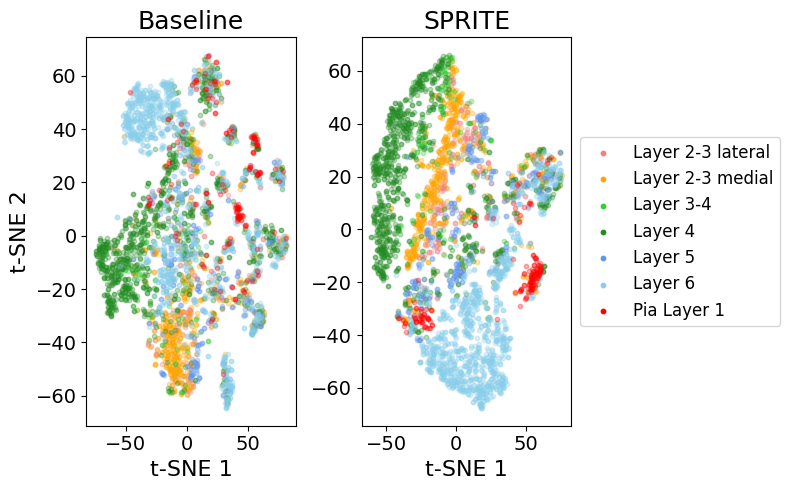

In [15]:
d = "Dataset15"
model = "spage"
label = "Region"
dr_method = "tsne"

################################################
# read in data
adata = sc.read_h5ad(f'scg_results/{d}_knn_spage_tangram.h5ad')

# Get ground truth clustering
true_clusters = adata.obs[label]


X_orig = results_dict[d][model]['ground_truth']
X_measured_dr = results_dict[d][model]['measured'][dr_method]
X_base_dr = results_dict[d][model]['baseline'][dr_method]
X_sprite_dr = results_dict[d][model]['sprite'][dr_method]

fig, axs = plt.subplots(1,2,figsize=(8,5))
for lab in np.unique(true_clusters):
    axs[0].scatter(X_base_dr[true_clusters==lab,0],X_base_dr[true_clusters==lab,1],label=lab,alpha=0.3,
                               rasterized=True, c=layer_color_map[lab], s=10)
axs[0].set_title("Baseline", fontsize=18)
axs[0].set_ylabel("t-SNE 2", fontsize=16)
axs[0].set_xlabel("t-SNE 1", fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=14)


for lab in np.unique(true_clusters):
    axs[1].scatter(X_sprite_dr[true_clusters==lab,0],X_sprite_dr[true_clusters==lab,1],label=lab,alpha=0.3,
                               rasterized=True, c=layer_color_map[lab], s=10)
axs[1].set_title("SPRITE", fontsize=18)
axs[1].set_xlabel("t-SNE 1", fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=14)

leg = axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.tight_layout()
plt.savefig(f'plots/sprite_visualization/{d}_{model}_{label}_{dr_method}.pdf', bbox_inches='tight', dpi=500)
plt.show()

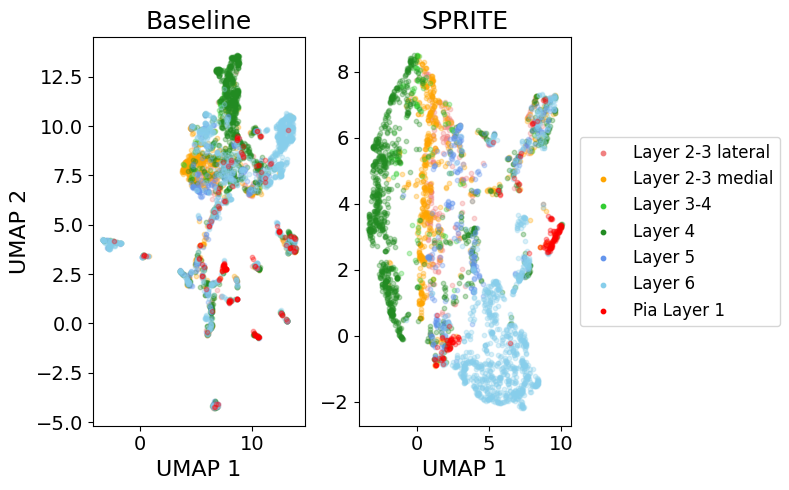

In [16]:
d = "Dataset15"
model = "spage"
label = "Region"
dr_method = "umap"

################################################
# read in data
adata = sc.read_h5ad(f'scg_results/{d}_knn_spage_tangram.h5ad')

# Get ground truth clustering
true_clusters = adata.obs[label]


X_orig = results_dict[d][model]['ground_truth']
X_measured_dr = results_dict[d][model]['measured'][dr_method]
X_base_dr = results_dict[d][model]['baseline'][dr_method]
X_sprite_dr = results_dict[d][model]['sprite'][dr_method]

fig, axs = plt.subplots(1,2,figsize=(8,5))
for lab in np.unique(true_clusters):
    axs[0].scatter(X_base_dr[true_clusters==lab,0],X_base_dr[true_clusters==lab,1],label=lab,alpha=0.3,
                               rasterized=True, c=layer_color_map[lab], s=10)
axs[0].set_title("Baseline", fontsize=18)
axs[0].set_ylabel("UMAP 2", fontsize=16)
axs[0].set_xlabel("UMAP 1", fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=14)


for lab in np.unique(true_clusters):
    axs[1].scatter(X_sprite_dr[true_clusters==lab,0],X_sprite_dr[true_clusters==lab,1],label=lab,alpha=0.3,
                               rasterized=True, c=layer_color_map[lab], s=10)
axs[1].set_title("SPRITE", fontsize=18)
axs[1].set_xlabel("UMAP 1", fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=14)

leg = axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.tight_layout()
plt.savefig(f'plots/sprite_visualization/{d}_{model}_{label}_{dr_method}.pdf', bbox_inches='tight', dpi=500)
plt.show()

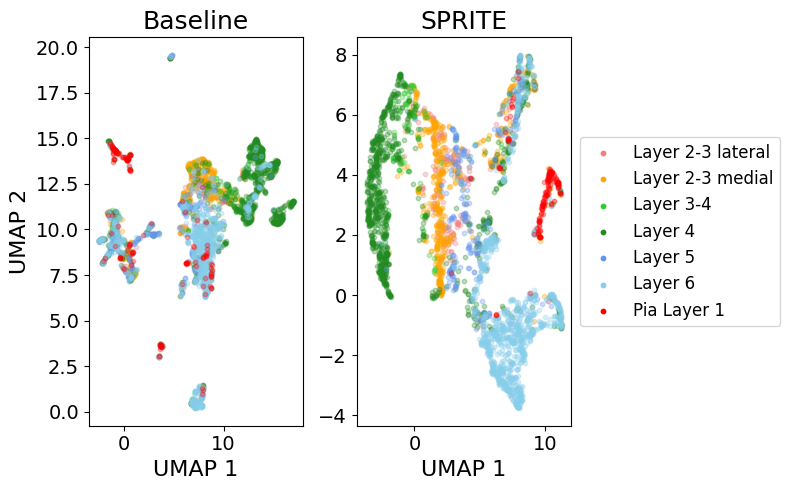

In [17]:
d = "Dataset15"
model = "knn"
label = "Region"
dr_method = "umap"

################################################
# read in data
adata = sc.read_h5ad(f'scg_results/{d}_knn_spage_tangram.h5ad')

# Get ground truth clustering
true_clusters = adata.obs[label]


X_orig = results_dict[d][model]['ground_truth']
X_measured_dr = results_dict[d][model]['measured'][dr_method]
X_base_dr = results_dict[d][model]['baseline'][dr_method]
X_sprite_dr = results_dict[d][model]['sprite'][dr_method]

fig, axs = plt.subplots(1,2,figsize=(8,5))
for lab in np.unique(true_clusters):
    axs[0].scatter(X_base_dr[true_clusters==lab,0],X_base_dr[true_clusters==lab,1],label=lab,alpha=0.3,
                               rasterized=True, c=layer_color_map[lab], s=10)
axs[0].set_title("Baseline", fontsize=18)
axs[0].set_ylabel("UMAP 2", fontsize=16)
axs[0].set_xlabel("UMAP 1", fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=14)


for lab in np.unique(true_clusters):
    axs[1].scatter(X_sprite_dr[true_clusters==lab,0],X_sprite_dr[true_clusters==lab,1],label=lab,alpha=0.3,
                               rasterized=True, c=layer_color_map[lab], s=10)
axs[1].set_title("SPRITE", fontsize=18)
axs[1].set_xlabel("UMAP 1", fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=14)

leg = axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.tight_layout()
plt.savefig(f'plots/sprite_visualization/{d}_{model}_{label}_{dr_method}.pdf', bbox_inches='tight', dpi=500)
plt.show()

/home/edsun/anaconda3/envs/geneimputation/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


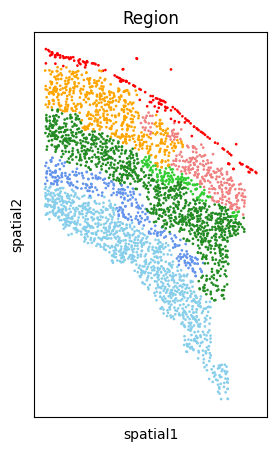

In [44]:
# Spatial Plot
fig, ax = plt.subplots(figsize=(3,5))
sc.pl.embedding(adata, "spatial", color="Region", palette=layer_color_map, ax=ax,
                legend_loc=None, size=15, show=False)
plt.savefig(f'plots/sprite_visualization/Spatial_{d}_{label}.pdf', bbox_inches='tight', dpi=500)
plt.show()